In [1]:
# imports 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('bmh')

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

from time import time

import joblib

# Two Classifiers without Reduction

In [2]:
# load models and test data

svm_model = joblib.load('models/svm_model.pk1')
rand_for_model = joblib.load('models/rand_for_model.pk1')

X = pd.read_csv('test_data/X.csv').to_numpy()
t = pd.read_csv('test_data/t.csv').to_numpy()

In [3]:
# load training data to gauge overfitting 

X_train = pd.read_csv('test_data/X_train.csv').to_numpy()
t_train = pd.read_csv('test_data/t_train.csv').to_numpy()

In addition to computing the performance measure in the test set, I also decided it would be beneficial to see the performance measures in the training set; this way, if large discrepencies arise in the disparity between training and testing, it would be easier to gauge overfitting and steps that may be taken to adjust.

In [4]:
# compute performance measures

svm_predict_train = svm_model.predict(X_train)

print('Training')
print('SVM F1 Score: ', f1_score(t_train, svm_predict_train))
print('SVM Accuracy Score: ', accuracy_score(t_train, svm_predict_train))

rand_for_predict_train = rand_for_model.predict(X_train)

print('Random Forest F1 Score: ', f1_score(t_train, rand_for_predict_train))
print('Random Forest Accuracy Score: ', accuracy_score(t_train, rand_for_predict_train))
print()

svm_predict = svm_model.predict(X)

print('Testing')
print('SVM F1 Score: ', f1_score(t, svm_predict))
print('SVM Accuracy Score: ', accuracy_score(t, svm_predict))

rand_for_predict = rand_for_model.predict(X)

print('Random Forest F1 Score: ', f1_score(t, rand_for_predict))
print('Random Forest Accuracy Score: ', accuracy_score(t, rand_for_predict))

Training
SVM F1 Score:  0.9993746091307066
SVM Accuracy Score:  0.9996875
Random Forest F1 Score:  0.9993753903810119
Random Forest Accuracy Score:  0.9996875

Testing
SVM F1 Score:  0.9329896907216495
SVM Accuracy Score:  0.9675
Random Forest F1 Score:  0.8970976253298153
Random Forest Accuracy Score:  0.95125


# Two Classifiers with PCA

In [5]:
# load models

pca_svm_model = joblib.load('models/pca_svm_model.pk1')
pca_rand_for_model = joblib.load('models/pca_rand_for_model.pk1')

In [6]:
# compute performance measures

pca_svm_predict_train = pca_svm_model.predict(X_train)

print('Training')
print('SVM w/ PCA F1 Score: ', f1_score(t_train, pca_svm_predict_train))
print('SVM w/ PCA Accuracy Score: ', accuracy_score(t_train, pca_svm_predict_train))

pca_rand_for_predict_train = pca_rand_for_model.predict(X_train)

print('Random Forest w/ PCA F1 Score: ', f1_score(t_train, pca_rand_for_predict_train))
print('Random Forest w/ PCA Accuracy Score: ', accuracy_score(t_train, pca_rand_for_predict_train))
print()

pca_svm_predict = pca_svm_model.predict(X)

print('Testing')
print('SVM w/ PCA F1 Score: ', f1_score(t, pca_svm_predict))
print('SVM w/ PCA Accuracy Score: ', accuracy_score(t, pca_svm_predict))

pca_rand_for_predict = pca_rand_for_model.predict(X)

print('Random Forest w/ PCA F1 Score: ', f1_score(t, pca_rand_for_predict))
print('Random Forest w/ PCA Accuracy Score: ', accuracy_score(t, pca_rand_for_predict))

Training
SVM w/ PCA F1 Score:  0.9930774071743235
SVM w/ PCA Accuracy Score:  0.9965625
Random Forest w/ PCA F1 Score:  1.0
Random Forest w/ PCA Accuracy Score:  1.0

Testing
SVM w/ PCA F1 Score:  0.9333333333333333
SVM w/ PCA Accuracy Score:  0.9675
Random Forest w/ PCA F1 Score:  0.8961748633879781
Random Forest w/ PCA Accuracy Score:  0.9525


# Two Classifiers with Manifold Learning Algorithms

In [7]:
# load models

lle_svm_model = joblib.load('models/lle_svm_model.pk1')
lle_rand_for_model = joblib.load('models/lle_rand_for_model.pk1')

In [8]:
# compute performance measures

lle_svm_predict_train = lle_svm_model.predict(X_train)

print('Training')
print('SVM w/ LLE F1 Score: ', f1_score(t_train, lle_svm_predict_train))
print('SVM w/ LLE Accuracy Score: ', accuracy_score(t_train, lle_svm_predict_train))

lle_rand_for_predict_train = lle_rand_for_model.predict(X_train)

print('Random Forest w/ LLE F1 Score: ', f1_score(t_train, lle_rand_for_predict_train))
print('Random Forest w/ LLE Accuracy Score: ', accuracy_score(t_train, lle_rand_for_predict_train))
print()

lle_svm_predict = lle_svm_model.predict(X)

print('Testing')
print('SVM w/ LLE F1 Score: ', f1_score(t, lle_svm_predict))
print('SVM w/ LLE Accuracy Score: ', accuracy_score(t, lle_svm_predict))

lle_rand_for_predict = lle_rand_for_model.predict(X)

print('Random Forest w/ LLE F1 Score: ', f1_score(t, lle_rand_for_predict))
print('Random Forest w/ LLE Accuracy Score: ', accuracy_score(t, lle_rand_for_predict))

Training
SVM w/ LLE F1 Score:  0.9174193548387096
SVM w/ LLE Accuracy Score:  0.96
Random Forest w/ LLE F1 Score:  1.0
Random Forest w/ LLE Accuracy Score:  1.0

Testing
SVM w/ LLE F1 Score:  0.8651399491094147
SVM w/ LLE Accuracy Score:  0.93375
Random Forest w/ LLE F1 Score:  0.8534704370179949
Random Forest w/ LLE Accuracy Score:  0.92875


#  Confusion Matrices, Misclassification, and Prediction Time

*Note: To better compare models, performance was measured above for each individual model, as to not make it difficult to see everything at once.

SVM Model
Prediction Time: 7.2 sec


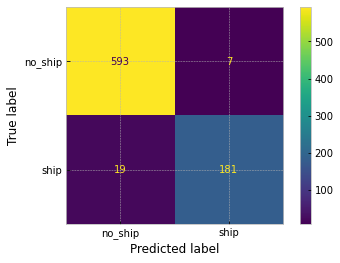

In [9]:
# measure start and end time to get model prediction time
t0=time()
svm_predict = svm_model.predict(X)
t1=time()

print('SVM Model')
print("Prediction Time: %.2g sec" % (t1 - t0))

disp = ConfusionMatrixDisplay(confusion_matrix(t, svm_predict), display_labels=['no_ship', 'ship']);
disp.plot();

In [10]:
def plot_images(images, title):  
    horizontal = 10 # denote size of vizual
    vertical = (len(images) // 10) + 1
    
    plt.figure(figsize=(horizontal, vertical))
    plt.suptitle(title)
    
    grid_loc = 1
    for i in range(len(images)):
        plt.subplot(vertical, horizontal, grid_loc)
        plt.imshow(images[i, :].reshape(80, 80, 3))
        plt.axis('off')
        grid_loc += 1
    
    plt.show()

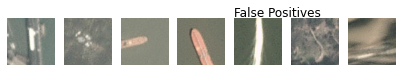

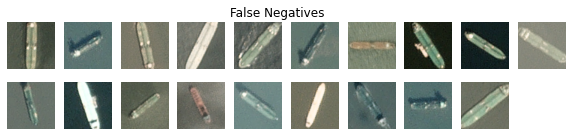

In [11]:
fp = X[(t.flatten() == 0) & (svm_predict == 1)]
fn = X[(t.flatten() == 1) & (svm_predict == 0)]

plot_images(fp, 'False Positives')
plot_images(fn, 'False Negatives'); 

Random Forest Model
Prediction Time: 0.08 sec


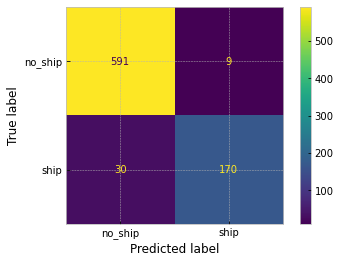

In [12]:
t0 = time()
rand_for_predict = rand_for_model.predict(X)
t1 = time()

print('Random Forest Model')
print("Prediction Time: %.2g sec" % (t1 - t0))

disp = ConfusionMatrixDisplay(confusion_matrix(t, rand_for_predict), display_labels=['no_ship', 'ship']);
disp.plot();

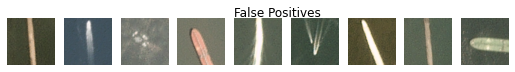

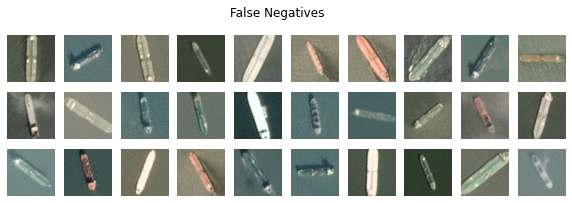

In [13]:
fp = X[(t.flatten() == 0) & (rand_for_predict == 1)]
fn = X[(t.flatten() == 1) & (rand_for_predict == 0)]

plot_images(fp, 'False Positives')
plot_images(fn, 'False Negatives'); 

SVM Model w/ PCA
Prediction Time: 0.14 sec


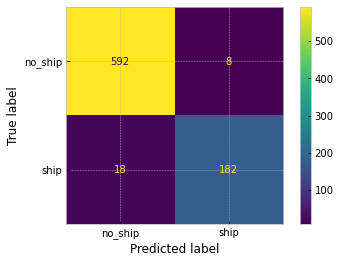

In [14]:
t0 = time()
pca_svm_predict = pca_svm_model.predict(X)
t1 = time()

print('SVM Model w/ PCA')
print("Prediction Time: %.2g sec" % (t1 - t0))

disp = ConfusionMatrixDisplay(confusion_matrix(t, pca_svm_predict), display_labels=['no_ship', 'ship']);
disp.plot();

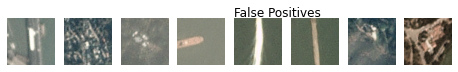

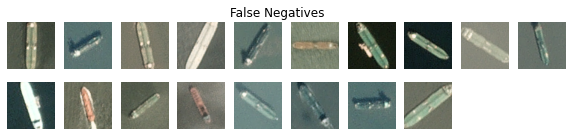

In [15]:
fp = X[(t.flatten() == 0) & (pca_svm_predict == 1)]
fn = X[(t.flatten() == 1) & (pca_svm_predict == 0)]

plot_images(fp, 'False Positives')
plot_images(fn, 'False Negatives'); 

Random Forest Model w/ PCA
Prediction Time: 0.12 sec


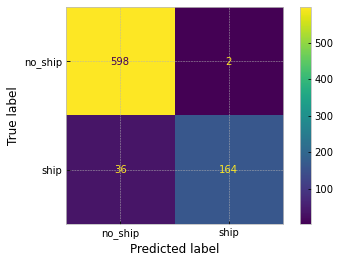

In [16]:
t0 = time()
pca_rand_for_predict = pca_rand_for_model.predict(X)
t1 = time()

print('Random Forest Model w/ PCA')
print("Prediction Time: %.2g sec" % (t1 - t0))

disp = ConfusionMatrixDisplay(confusion_matrix(t, pca_rand_for_predict), display_labels=['no_ship', 'ship']);
disp.plot();

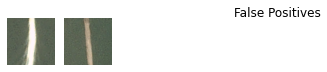

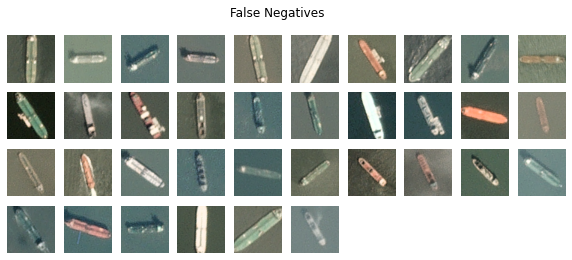

In [17]:
fp = X[(t.flatten() == 0) & (pca_rand_for_predict == 1)]
fn = X[(t.flatten() == 1) & (pca_rand_for_predict == 0)]

plot_images(fp, 'False Positives')
plot_images(fn, 'False Negatives'); 

SVM Model w/ LLE
Prediction Time: 4.5 sec


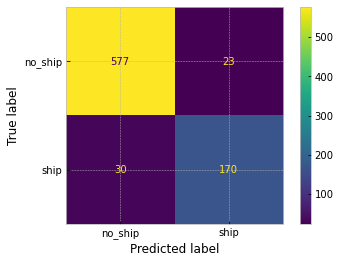

In [18]:
t0 = time()
lle_svm_predict = lle_svm_model.predict(X)
t1 = time()

print('SVM Model w/ LLE')
print("Prediction Time: %.2g sec" % (t1 - t0))

disp = ConfusionMatrixDisplay(confusion_matrix(t, lle_svm_predict), display_labels=['no_ship', 'ship'])
disp.plot();

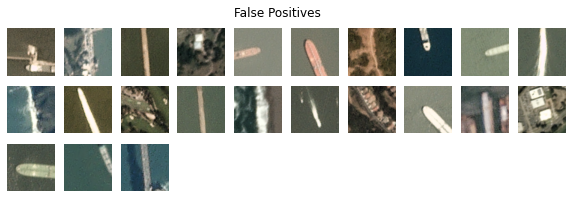

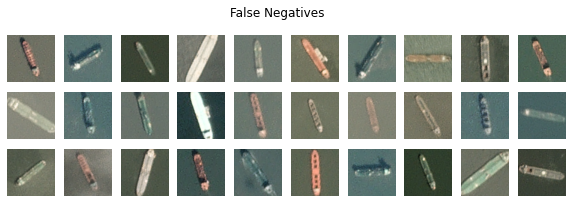

In [19]:
fp = X[(t.flatten() == 0) & (lle_svm_predict == 1)]
fn = X[(t.flatten() == 1) & (lle_svm_predict == 0)]

plot_images(fp, 'False Positives')
plot_images(fn, 'False Negatives'); 

Random Forest Model w/ LLE
Prediction Time: 4.5 sec


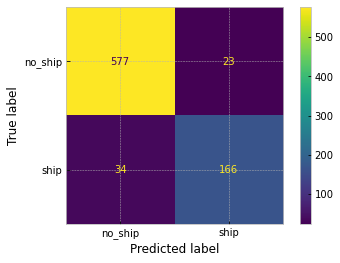

In [20]:
t0 = time()
lle_rand_for_predict = lle_rand_for_model.predict(X)
t1 = time()

print('Random Forest Model w/ LLE')
print("Prediction Time: %.2g sec" % (t1 - t0))

disp = ConfusionMatrixDisplay(confusion_matrix(t, lle_rand_for_predict), display_labels=['no_ship', 'ship'])
disp.plot();

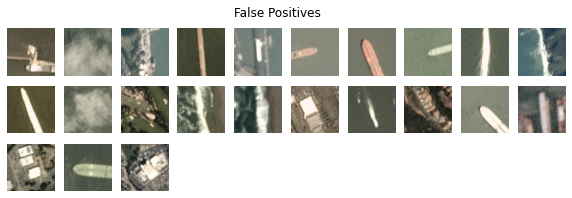

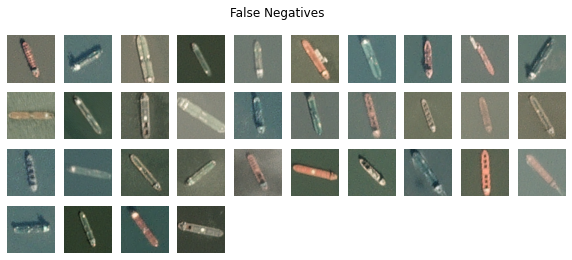

In [21]:
fp = X[(t.flatten() == 0) & (lle_rand_for_predict == 1)]
fn = X[(t.flatten() == 1) & (lle_rand_for_predict == 0)]

plot_images(fp, 'False Positives')
plot_images(fn, 'False Negatives'); 

In [ ]:
import os
from PIL import Image
bay_name = ['San Pedro Bay']*4 + ['San Francisco Bay']*4

patch_size = (80, 80)
step_size = 20

directory = 'scenes/'
plt.figure(figsize=(15,5))
j=1
for file in os.listdir(directory):
    if file.endswith('.png'):
        filename = directory+'/'+file
        # Loads image
        image = np.array(Image.open(filename).convert('RGB'))
        height, width, _ = image.shape
        
        plt.subplot(2,4,j); plt.imshow(image); plt.axis('off');plt.title(bay_name[j-1])
        
        for y in range(0, height-patch_size[1] + 1, step_size): # move through each scene with patch sizes
            for x in range(0, width-patch_size[0] + 1, step_size):
                patch = image[y:y + patch_size[1], x:x + patch_size[0]].reshape(19200)
                prediction = svm_model.predict(patch[np.newaxis, ...])
                
                if(prediction[0] == 1):
                    plt.gca().add_patch(plt.Rectangle((x, y), patch_size[0], patch_size[1],
                                        linewidth=1, edgecolor='red', facecolor='none'))
        j+=1

Across all false positives, it appears that the majority arose from no_ship images that had a large feature in the center that was long but skinny (similar to a ship). Some models also demonstrate that noisy data (with some slight prominent feature in the center) may produce a false positive. The false negatives are a little harder to determine; many of the models appear to have disregarded ships that covered the entire screen as being 'no_ship.' This may be due to the fact that images where ships were not prominently displayed were counted as no ship, and thus may be due to the human classification of 'ship' versus 'no_ship' not fully being recognized by the models. Other false negatives appear to be images of ships with shadows or that are very hazy, which may be confusing the models in determining whether a ship actually exists.

Addressing this may require some more hyperparameter tuning; given the limited amount of processing power and time, more hyperparameter tuning may allow models to more easily capture the generalizeable features that would help determine if something is a ship or not. It may also be possible to manually engineer some features; most ships appear to have some sort of tapered end, and this may not be captured by models. However, this may also require more complex models, which could be susceptible to overfitting. A way to handle false negatives would most likely be to make the labelings of 'ship' versus 'no_ship' less strict, which would help a majority of the models in classifying the ships. This also may need more hyperparameter tuning, however.